<h1>XN Project 2019 Fall</h1>

<h2>Project Description</h2>

In this project, we are going to explore functions to automatically generate analysis report for research trend, which will help onclusive customers maintain a better pubulic relationship and win more market share in the furture.
Our work have mainly divided into following parts:
<ul>
<li><i><b>Assumption</b></i></li>
   Assume our client is apple,Inc, who want to know sentiments on the website about its product airpods. 
<li><i><b>Data Collection</b></i></li>
    Based on the above assumption and our final goals, we collect data about airpods.including sources, date, author,     title, topic and content.
<li><i><b>Exploratory Data Analysis</b></i></li>
    EDA will be done to see how data spread and try fo find insights from raw data.
<li><i><b>Sentiments Analysis</b></i></li>
    Using Natural Language Process to do text mining, from the results of which, we will provides several visuals         about article frequency, authors, publications, competiotrs and co-mentioned terms which indicates features that     customer care about.
<li><i><b>Automatical Reports</b></i></li>
    On top of visuals, there are also corresponding reports to help customer understand those visuals and some           suggestions are provided to do market campaigns.
    
    
    

<h2>Exploratory Data Analysis</h2>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/yanting'

In [3]:
raw = pd.read_csv('/Users/yanting/Desktop/XN_FinalDATA_Airpod - Sheet1.csv')

In [4]:
raw.head()

,Article_id,Topic,Title,Subtitle,Author,Source,Reviews,Date,URL,Content
0,1,Tech,Airpods are Tragedy,Apple claims that AirPods are building a “wire...,Caroline Haskins,VICE,NaN,2019-05-06,https://www.vice.com/en_us/article/neaz3d/airp...,"In each article of this column, we'll focus on..."
1,2,Tech,Amazon Pursues Apple’s AirPods With Echo Bud W...,NaN,Mark Gurman,Bloomberg,NaN,2019-09-25,https://www.bloomberg.com/news/articles/2019-0...,Amazon.com Inc. revealed its rival to Apple In...
2,3,Tech,The latest Apple AirPods are finally on sale,NaN,Isabelle Kagan,USATODAY,NaN,2019-08-21,https://www.usatoday.com/story/tech/reviewedco...,The latest model of AirPods—the ones that come...
3,4,Tech,"Apple AirPods Review: Perfect Earbuds, but The...","Sleek and convenient, Apple’s wireless earbuds...",Brian Chen,TheNewYorkTimes,NaN,2019-04-03,https://www.nytimes.com/2019/04/03/technology/...,"Apple’s new AirPods, those tiny wireless earbu..."
4,5,Market,Music to Apple’s Ears,Newly updated AirPods amped up non-iPhone busi...,Dan Gallagher,TheWallStreetJournal,NaN,2019-08-01,https://www.wsj.com/articles/music-to-apples-e...,Apple Inc.’s AirPods met with no small amount ...


In [5]:
len(raw)

65

In [6]:
import seaborn as sns

In [7]:
raw.Source.unique()

array(['VICE', 'Bloomberg', 'USATODAY', 'TheNewYorkTimes',
       'TheWallStreetJournal', 'Apple', 'The Guardian', 'QUARTZ',
       'The Washington Post', 'Forbes', 'Los Angeles Times', 'CNN',
       'MEL Beta', 'COMPLEX', 'VOX', 'SoundGuys', '9to5Mac',
       'DAILYMAIL.COM', 'The Atlantic', 'Digital Trends', 'arsTechnica',
       "Tom'sguide", 'TheSun', 'New York Post', 'Cnet', 'CBS', 'Techno',
       'NPR', 'Elite Daily', 'YOUREDM', 'The Verge', 'Business Insider',
       'GottaBeMobile', 'VOA', 'HYPEBEAST', 'Engadget', 'Android Central',
       'The Sydney Morning Herald', 'Inverse', 'BGR', 'WIRED'],
      dtype=object)

In [8]:
len(raw.Source.unique())

41

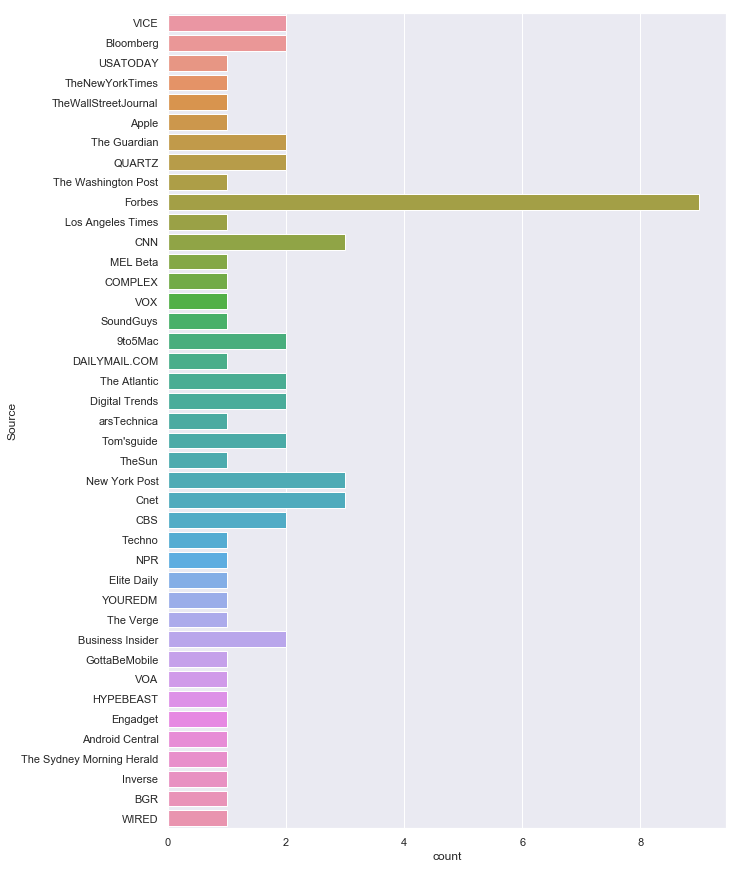

In [9]:
sns.set(font_scale=1, rc={"figure.figsize":(10,15)})
ax1 = sns.countplot(y="Source", data=raw)

In [10]:
import matplotlib.pyplot as plt

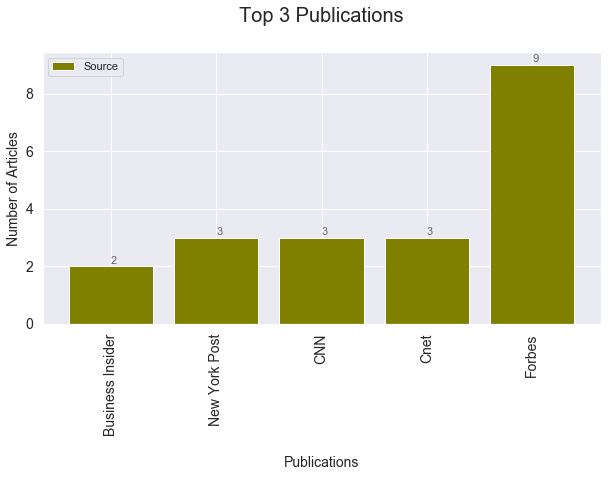

In [11]:
article_source5 = raw.Source.value_counts().sort_values(ascending = True).tail(5)
article_source5 = pd.DataFrame(article_source5)
ax2 = article_source5.plot(kind = 'bar',figsize = (10,5),width = 0.8,fontsize = 14,color = 'olive')
ax2.set_title('Top 3 Publications',fontsize = 20,pad = 30)
ax2.set_ylabel('Number of Articles',fontsize = 14)
ax2.xaxis.labelpad = 20
ax2.set_xlabel('Publications',fontsize = 14)
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_x()+0.4, i.get_height()+0.1, \
            str(i.get_height()), fontsize=11, color='dimgrey')

From the above figure, in terms of airpords articles, we can find Forbes has more articles than other publications, releasing 9 in 2019.

Text(0.5, 1.0, 'Topics Frequency')

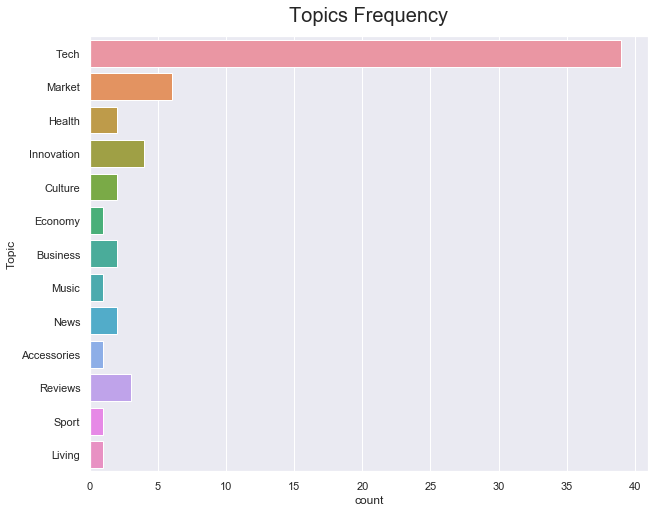

In [12]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,8)})
ax3 = sns.countplot(y="Topic", data=raw)
ax3.set_title('Topics Frequency',fontsize = 20,pad = 15)

Most articles involving airpods are assigned in tech section.

In [13]:
# packages
import nltk, urllib, requests, string, re
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yanting/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
raw['word_count'] = raw['Content'].apply(lambda x: len(str(x).split(" ")))
raw[['Content','word_count']].head()

,Content,word_count
0,"In each article of this column, we'll focus on...",3014
1,Amazon.com Inc. revealed its rival to Apple In...,121
2,The latest model of AirPods—the ones that come...,61
3,"Apple’s new AirPods, those tiny wireless earbu...",615
4,Apple Inc.’s AirPods met with no small amount ...,73


Text(0, 0.5, 'Words')

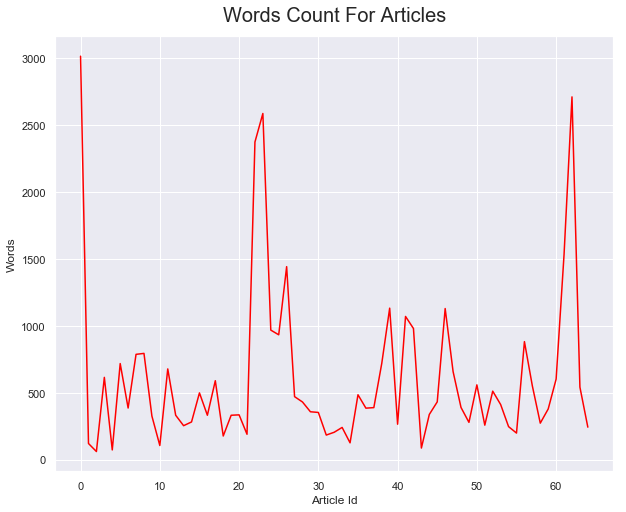

In [15]:
plt.plot(raw.word_count,color = 'red')
plt.title("Words Count For Articles",pad = 15,fontsize = 20)
plt.xlabel("Article Id")
plt.ylabel("Words")

In [16]:
def key_word(s):
    rawdata = BeautifulSoup(s, 'html.parser').get_text() 
    rawdata=rawdata.lower() 
    rawdata=re.sub(r'\d+', '', rawdata) 
    tokens = word_tokenize(rawdata) 
    list0 = stopwords.words('English')
    list1 = ['airpods—the','case—are']
    sw = list0
    sw.extend(list1)
    new_token=list()
    for t in tokens:
        if t not in sw:
            new_token.append(t)
    punc=list(string.punctuation) # list puntuations from string package
    punc.append('“')  # add other signs that do not contained in sting list
    punc.append('”')
    punc.append('’')
    punc.append('\'') 
    punc.append("n't")
    punc.append("'m")
    punc.append("th")
    punc.append("'d")
    punc.append("'ve")
    punc.append("'re")
    punc.append("'ll")
    punc.append("--")
    punc.append("-a")
    punc.append("'s")
    punc.append("\"")
    new_token2=list()
    for t in new_token:
        if t not in punc:
            new_token2.append(t) # this list contain key words
    tagged = nltk.pos_tag(new_token2)
    l = list()
    for x in tagged:
        if x[1] =='NN' or x[1] =='NNS':
            l.append(x[0])
    return l

In [17]:
word_count = {}
for i in raw.Content:
    words = key_word(i)
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] = word_count[word] + 1
data = pd.DataFrame.from_dict(word_count, orient='index')
data = data.reset_index()
data.columns = ['Terms','Count']
terms =data.sort_values(by = ['Count'],ascending = False).head(20)
terms = terms[2:]
terms1=terms.sort_index()
terms1

,Terms,Count
10,product,59
61,company,55
63,music,59
65,phone,51
69,battery,67
80,headphones,160
86,people,104
90,pair,53
96,design,63
101,life,76


Text(0.5, 1.0, 'Top 20 Co_Mentioned Terms')

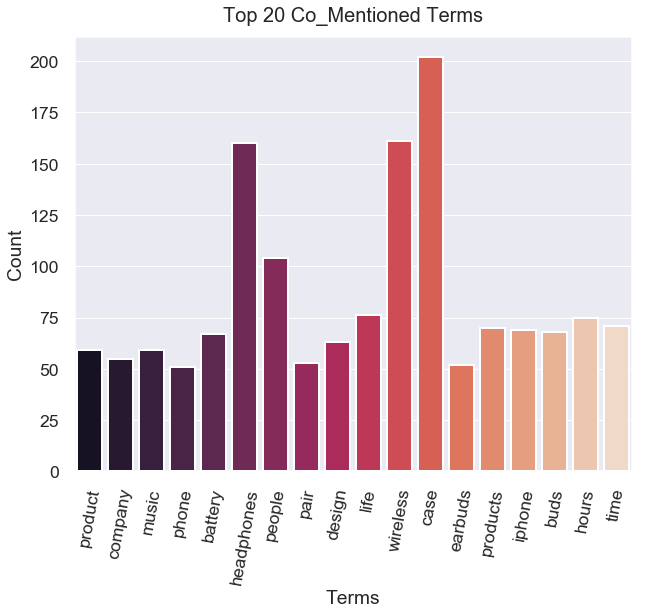

In [27]:

sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 1})
ax4 = sns.barplot(x="Terms", y="Count", data=terms1, palette="rocket")
for item in ax4.get_xticklabels():
    item.set_rotation(80)
ax4.set_title('Top 20 Co_Mentioned Terms',fontsize = 20,pad = 15)